In [1]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
#import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

import gsw


In [2]:
# load ROMS avg output
for mm  in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    ds = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/ocean_avg_00' + mm + '.nc')
    print(ds.variables["temp"].shape)
    temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
    salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
    shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
    ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
    m_tmp = np.nanmean(ds.variables["m"], axis=0)

    ds = ds.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])
    if ds.Vtransform == 1:
        Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
        z_rho_tmp = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
        print("Vtransform=1")
    elif ds.Vtransform == 2:
        Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
        z_rho_tmp = ds.zeta + (ds.zeta + ds.h) * Zo_rho
        print("Vtransform=2")
        Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
        z_w_tmp = ds.zeta + (ds.zeta + ds.h) * Zo_w

    z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
    z_w_avg = np.nanmean(z_w_tmp,axis=0)

    # concatanate monthly avgs into a yearly variable
    if mm == '01':
        temp = temp_tmp
        salt = salt_tmp
        shflux = shflux_tmp
        ssflux = ssflux_tmp
        m = m_tmp
        z_rho = z_rho_avg
        z_w = z_w_avg
    elif mm == '02':
        temp = np.stack((temp,temp_tmp), axis=0)
        salt = np.stack((salt,salt_tmp), axis=0)
        shflux = np.stack((shflux,shflux_tmp), axis=0)
        ssflux = np.stack((ssflux,ssflux_tmp), axis=0)
        m = np.stack((m,m_tmp), axis=0)
        z_rho = np.stack((z_rho,z_rho_avg), axis=0)
        z_w = np.stack((z_w,z_w_avg), axis=0)
    else:
        temp_tmp_4thdim = np.expand_dims(temp_tmp, axis=0)
        temp = np.concatenate((temp,temp_tmp_4thdim), axis=0)
        salt_tmp_4thdim = np.expand_dims(salt_tmp, axis=0)
        salt = np.concatenate((salt,salt_tmp_4thdim), axis=0)
        shflux_tmp_4thdim = np.expand_dims(shflux_tmp, axis=0)
        shflux = np.concatenate((shflux,shflux_tmp_4thdim), axis=0)
        ssflux_tmp_4thdim = np.expand_dims(ssflux_tmp, axis=0)
        ssflux = np.concatenate((ssflux,ssflux_tmp_4thdim), axis=0)
        m_tmp_4thdim = np.expand_dims(m_tmp, axis=0)
        m = np.concatenate((m,m_tmp_4thdim), axis=0)
        z_rho_tmp_4thdim = np.expand_dims(z_rho_avg, axis=0)
        z_rho = np.concatenate((z_rho,z_rho_tmp_4thdim), axis=0)
        z_w_tmp_4thdim = np.expand_dims(z_w_avg, axis=0)
        z_w = np.concatenate((z_w,z_w_tmp_4thdim), axis=0)
#ds.coords['flux'] = flux#.transpose() # put flux into ds dataset

    ds.close()

sigma_t_sfc = gsw.rho(salt[:,-1,:,:],temp[:,-1,:,:],0) - 1000

di = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/ocean_avg_0001.nc')
ice_draft = di.variables["zice"]

mask_zice = ma.masked_where(ice_draft < 0, np.ones(ice_draft.shape))

di.close()

(7, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


In [3]:
# calculate dz following:
dz = np.empty((12,560,630,31))
dz_inv = np.empty((12,560,630,31))


for tt in np.arange(0,12):
    z_w_sorted = -1*z_w[tt,:,:,::-1]
    print(z_w_sorted.shape)
    dz_inv[tt,:,:,:] = np.diff(z_w_sorted,axis=2)
    dz[tt,:,:,:] = dz_inv[tt,:,:,::-1]

dg = xr.open_dataset("/scratch/project_2000339/boeiradi/waom10_frc/waom10extend_grd.nc")

lat_rho = dg.variables["lat_rho"]
lon_rho = dg.variables["lon_rho"]
pm = dg.variables["pm"]
pn = dg.variables["pn"]

ds.coords['lat_rho']=lat_rho.transpose() # put lat_rho into ds dataset
ds.coords['lon_rho']=lon_rho.transpose() # put lon_rho into ds dataset


dx = xr.open_dataset('/scratch/project_2000339/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/MLD_vint_vars_for_WMT.nc')
print(dx.variables["sfc_mld"].shape)
sfc_mld = dx.variables["sfc_mld"]
# - variables across ML base
temp_avg_mld = dx.variables["temp_avg_mld"]
salt_avg_mld = dx.variables["salt_avg_mld"]

# - variables integrated throughout the ML; multiply by -1 b/c dz is negative.
temp_vdia_diff_mld_vint = dx.variables["temp_vdia_diff_mld_vint"]
salt_vdia_diff_mld_vint = dx.variables["salt_vdia_diff_mld_vint"]
temp_hdia_diff_mld_vint = dx.variables["temp_hdia_diff_mld_vint"]
salt_hdia_diff_mld_vint = dx.variables["salt_hdia_diff_mld_vint"]
temp_vdia_adv_mld_vint = dx.variables["temp_vdia_adv_mld_vint"]
salt_vdia_adv_mld_vint = dx.variables["salt_vdia_adv_mld_vint"]
temp_hdia_adv_mld_vint = dx.variables["temp_hdia_adv_mld_vint"]
salt_hdia_adv_mld_vint = dx.variables["salt_hdia_adv_mld_vint"]
temp_tend_mld_vint = dx.variables["temp_tend_avg_mld_vint"]
salt_tend_mld_vint = dx.variables["salt_tend_avg_mld_vint"]

sigma_t = gsw.rho(salt_avg_mld,temp_avg_mld,0) - 1000

dx.close()

(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(12, 560, 630)


In [4]:
# obtain thermal expansion (alpha) & salinity contraction (beta) coefficients:
SA_avg_mld = np.empty(salt_avg_mld.shape)
# neet Absolute Salinity, converting from Pratical Salinity:
for mm in np.arange(0,12):
    SA_tmp =gsw.SA_from_SP(np.squeeze(salt_avg_mld[mm,:,:]),0,lon_rho,lat_rho)
    SA_avg_mld[mm,:,:] = SA_tmp
    del SA_tmp

# gsw.alpha/gsw.beta
#alpha = gsw_alpha(SA,CT,p)
[specvol_mld, alpha_mld, beta_mld] = gsw.specvol_alpha_beta(SA_avg_mld,temp_avg_mld,0)

print(alpha_mld.shape)

# calculate the LHS term in Pellichero et al (2018):
# ps: Diffusion (R_s, R_t) terms already include the sfc fluxes

# heat (eqn 5)
rho0 = 1025 #1000
Cp = 3985

# total diffusion terms:
R_s_vint = beta_mld*(salt_hdia_diff_mld_vint + salt_vdia_diff_mld_vint)
R_t_vint = alpha_mld*(temp_hdia_diff_mld_vint + temp_vdia_diff_mld_vint)

# surface flux terms:
salt_sfc = beta_mld*(ssflux)
temp_sfc = alpha_mld*(np.divide(shflux, rho0*Cp))

# advection terms:
salt_adv_mld_vint = beta_mld*(salt_hdia_adv_mld_vint + salt_vdia_adv_mld_vint)
temp_adv_mld_vint = alpha_mld*(temp_hdia_adv_mld_vint + temp_vdia_adv_mld_vint)

# net tendencies
salt_net_mld_vint = beta_mld*salt_tend_mld_vint
temp_net_mld_vint = alpha_mld*temp_tend_mld_vint



(12, 560, 630)


In [5]:
#  Function to calculate Water Mass Transformation (in m3/s):

# rho grid for binning:
#rho_grid=np.arange(35.5,37.4,0.1) # for sigma-2
rho_grid=np.arange(24.4,29.1,0.1) # for sigma-0
len_rho_grid=len(rho_grid)

dx = np.divide(1,pm)
dy = np.divide(1,pn)
dt = 86400#30#/12 #why divide by 12?

def wmt(var_int, dx, dy,var_type):
    # var_type: 'budget' or 'sfc_frc'

    F_rate_var_vint = np.empty(var_int.shape)

    for mm in np.arange(0,12):
        if var_type == 'budget':
            F_rate_var_vint[mm,:] = dx*dy*var_int.isel(times=mm)
        elif var_type == 'sfc_frc':
            F_rate_var_vint[mm,:] = dx*dy*var_int[mm,:,:]

    print(F_rate_var_vint.shape)

    F_rate_delta_var_vint_mm = np.empty((12,len_rho_grid,560,630))

    for mm in np.arange(0,12):
        sigma_tmp = sigma_t[mm,:,:]

        #print(mm)
        for irho in np.arange(0,len_rho_grid):

            #print(irho)
            F_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), F_rate_var_vint[mm,:,:])

            if irho == 0:
                F_rate_delta = F_rate_tmp.copy()
                F_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            elif irho == 1:
                F_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
                F_rate_delta = np.stack((F_rate_delta,F_rate_tmp), axis=0)
            else:
                F_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
                F_rate_extradim = np.expand_dims(F_rate_tmp, axis=0)
                F_rate_delta = np.concatenate((F_rate_delta,F_rate_extradim), axis=0)
            del F_rate_tmp

        F_rate_delta_var_vint_mm[mm,:] = F_rate_delta

    print('completed, size: ', F_rate_delta_var_vint_mm.shape)

    return F_rate_delta_var_vint_mm

In [6]:
# shelf/open-ocean masks:
mask_open = ma.masked_where(dg.h <= 2000, np.ones(dg.h.shape))
mask_shelf = ma.masked_where(dg.h > 2000, np.ones(dg.h.shape))


proj = ccrs.SouthPolarStereo()

# fig = plt.figure(figsize=(10,12))
# ax1 = fig.add_subplot(321)
# cy=plt.pcolormesh(mask_shelf)
# plt.colorbar(cy)
# plt.clim(0.,1.)
# ax2 = fig.add_subplot(322)
# cy=plt.pcolormesh(mask_zice)
# plt.colorbar(cy)
# plt.clim(0.,1.)
# ax3 = fig.add_subplot(323, projection=proj)
# cy=plt.pcolormesh(lon_rho, lat_rho, dg.h, transform=ccrs.PlateCarree())
# plt.colorbar(cy)
# #plt.clim(0.,1.)
# ax4 = fig.add_subplot(324)
# cy=plt.pcolormesh(lon_rho)
# plt.colorbar(cy)
# ax5 = fig.add_subplot(325)
# cy=plt.pcolormesh(lat_rho)
# plt.colorbar(cy)
# plt.show()


In [7]:
# create mask per longitude: Weddell, Maud Land, East Antarctica, Ross, West Antarctica
import matplotlib.path as mpath
import cartopy.feature as cfeature

# 2) Mask Maud Land (25W : 60E, lat < -60)

mask_Mau1lon = ma.masked_where(lon_rho <= -25, np.ones(lon_rho.shape)) # East limit for any latitude
mask_Mau1lat = ma.masked_where(lat_rho > -60, np.ones(lat_rho.shape))
mask_Mau1 = mask_Mau1lon*mask_Mau1lat

mask_Mau2lon = ma.masked_where(lon_rho >= 60, np.ones(lon_rho.shape)) # East limit for any latitude
mask_Mau2lat = ma.masked_where(lat_rho > -60, np.ones(lat_rho.shape))
mask_Mau2 = mask_Mau2lon*mask_Mau2lat

mask_Mau = mask_Mau1*mask_Mau2

# fig = plt.figure(figsize=(10,12))
# ax1 = fig.add_subplot(221)
# cy=plt.pcolormesh(mask_Mau1)
# plt.colorbar(cy)
# ax1 = fig.add_subplot(222)
# cy=plt.pcolormesh(mask_Mau2)
# plt.colorbar(cy)
# ax3 = fig.add_subplot(223)
# cy=plt.pcolormesh(mask_Mau)
# plt.colorbar(cy)
# ax4 = fig.add_subplot(224, projection=proj)
# cy=plt.pcolormesh(lon_rho, lat_rho, dg.h*mask_Mau, transform=ccrs.PlateCarree())
# plt.colorbar(cy)
# ax4.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white')
# plt.show()

In [8]:
# Shelf only: Maud Land

Fs_rate_delta_adv_vint_shelf_Mau_mm = wmt(salt_adv_mld_vint*mask_shelf*mask_Mau*mask_Mau, dx, dy,'budget')
Fs_rate_delta_diff_vint_shelf_Mau_mm = wmt(R_s_vint*mask_shelf*mask_Mau, dx, dy,'budget')
Fs_rate_delta_net_vint_shelf_Mau_mm = wmt(salt_net_mld_vint*mask_shelf*mask_Mau, dx, dy,'budget')
Fs_rate_delta_sfc_shelf_Mau_mm = wmt(salt_sfc*mask_shelf*mask_Mau, dx, dy,'sfc_frc')

Fh_rate_delta_adv_vint_shelf_Mau_mm = wmt(temp_adv_mld_vint*mask_shelf*mask_Mau, dx, dy,'budget')
Fh_rate_delta_diff_vint_shelf_Mau_mm = wmt(R_t_vint*mask_shelf*mask_Mau, dx, dy,'budget')
Fh_rate_delta_net_vint_shelf_Mau_mm = wmt(temp_net_mld_vint*mask_shelf*mask_Mau, dx, dy,'budget')
Fh_rate_delta_sfc_shelf_Mau_mm = wmt(temp_sfc*mask_shelf*mask_Mau, dx, dy,'sfc_frc')

Fm_rate_delta_sfc_shelf_Mau_mm = wmt(beta_mld*m*mask_shelf*mask_Mau, dx, dy,'sfc_frc')


(12, 560, 630)
completed, size:  (12, 48, 560, 630)
(12, 560, 630)
completed, size:  (12, 48, 560, 630)
(12, 560, 630)
completed, size:  (12, 48, 560, 630)
(12, 560, 630)
completed, size:  (12, 48, 560, 630)
(12, 560, 630)
completed, size:  (12, 48, 560, 630)
(12, 560, 630)
completed, size:  (12, 48, 560, 630)
(12, 560, 630)
completed, size:  (12, 48, 560, 630)
(12, 560, 630)
completed, size:  (12, 48, 560, 630)
(12, 560, 630)
completed, size:  (12, 48, 560, 630)


In [9]:
# integrated over x, y directions: only continental shelf

Fs_rate_sfc_shelf_Mau_mm_int = np.empty((len(rho_grid),12))
Fm_rate_sfc_shelf_Mau_mm_int = np.empty((len(rho_grid),12))
Fh_rate_sfc_shelf_Mau_mm_int = np.empty((len(rho_grid),12))

Fs_rate_adv_vint_shelf_Mau_mm_int = np.empty((len(rho_grid),12))
Fh_rate_adv_vint_shelf_Mau_mm_int = np.empty((len(rho_grid),12))
Fs_rate_diff_vint_shelf_Mau_mm_int = np.empty((len(rho_grid),12))
Fh_rate_diff_vint_shelf_Mau_mm_int = np.empty((len(rho_grid),12))
Fs_rate_net_vint_shelf_Mau_mm_int = np.empty((len(rho_grid),12))
Fh_rate_net_vint_shelf_Mau_mm_int = np.empty((len(rho_grid),12))


for irho in np.arange(0,len(rho_grid)):
    for mm in np.arange(0,12):

        Fs_rate_sfc_shelf_Mau_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_sfc_shelf_Mau_mm[mm,irho,:], axis=1), axis=0)
        Fm_rate_sfc_shelf_Mau_mm_int[irho,mm] = np.nansum(np.nansum(Fm_rate_delta_sfc_shelf_Mau_mm[mm,irho,:], axis=1), axis=0)
        Fh_rate_sfc_shelf_Mau_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_sfc_shelf_Mau_mm[mm,irho,:], axis=1), axis=0)

        Fs_rate_adv_vint_shelf_Mau_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_adv_vint_shelf_Mau_mm[mm,irho,:], axis=1), axis=0)
        Fh_rate_adv_vint_shelf_Mau_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_adv_vint_shelf_Mau_mm[mm,irho,:], axis=1), axis=0)

        Fs_rate_diff_vint_shelf_Mau_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_diff_vint_shelf_Mau_mm[mm,irho,:], axis=1), axis=0)
        Fh_rate_diff_vint_shelf_Mau_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_diff_vint_shelf_Mau_mm[mm,irho,:], axis=1), axis=0)

        Fs_rate_net_vint_shelf_Mau_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_net_vint_shelf_Mau_mm[mm,irho,:], axis=1), axis=0)
        Fh_rate_net_vint_shelf_Mau_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_net_vint_shelf_Mau_mm[mm,irho,:], axis=1), axis=0)

In [10]:
# figures
fig_path = '/users/boeiradi/COLD_project/postprocessing/figs/WMT/'

# plot with bars
width=.023

# convert to rate per year:
Dt = rho0

# divide for Dt (sec in 1 year) and 10^6 to obtain rate in Sv year-1

# SFC: continental shelf
Fs_sig_sfc_shelf_Mau_mm = -Fs_rate_sfc_shelf_Mau_mm_int*rho0/1e6
Fm_sig_sfc_shelf_Mau_mm = -Fm_rate_sfc_shelf_Mau_mm_int*rho0/1e6
Fh_sig_sfc_shelf_Mau_mm = -Fh_rate_sfc_shelf_Mau_mm_int*rho0/1e6
F_sig_sfc_shelf_Mau_mm = -Fs_sig_sfc_shelf_Mau_mm + Fh_sig_sfc_shelf_Mau_mm + Fm_sig_sfc_shelf_Mau_mm
# - calculate the anual average of the monthly ars:
Fs_sig_sfc_shelf_Mau =  np.nanmean(Fs_sig_sfc_shelf_Mau_mm, axis=1)
Fm_sig_sfc_shelf_Mau =  np.nanmean(Fm_sig_sfc_shelf_Mau_mm, axis=1)
Fh_sig_sfc_shelf_Mau =  np.nanmean(Fh_sig_sfc_shelf_Mau_mm, axis=1)
F_sig_sfc_shelf_Mau = -Fs_sig_sfc_shelf_Mau+ Fh_sig_sfc_shelf_Mau+ Fm_sig_sfc_shelf_Mau

# ADV (vint)
Fs_sig_adv_vint_shelf_Mau_mm = -Fs_rate_adv_vint_shelf_Mau_mm_int*rho0/1e6
Fh_sig_adv_vint_shelf_Mau_mm = -Fh_rate_adv_vint_shelf_Mau_mm_int*rho0/1e6
F_sig_adv_vint_shelf_Mau_mm = -Fs_sig_adv_vint_shelf_Mau_mm + Fh_sig_adv_vint_shelf_Mau_mm
# - calculate the anual average of the monthly ars:
Fs_sig_adv_vint_shelf_Mau =  np.nanmean(Fs_sig_adv_vint_shelf_Mau_mm, axis=1)
Fh_sig_adv_vint_shelf_Mau =  np.nanmean(Fh_sig_adv_vint_shelf_Mau_mm, axis=1)
F_sig_adv_vint_shelf_Mau = -Fs_sig_adv_vint_shelf_Mau+ Fh_sig_adv_vint_shelf_Mau

# DIFF
Fs_sig_diff_vint_shelf_Mau_mm = -Fs_rate_diff_vint_shelf_Mau_mm_int*rho0/1e6
Fh_sig_diff_vint_shelf_Mau_mm = -Fh_rate_diff_vint_shelf_Mau_mm_int*rho0/1e6
F_sig_diff_vint_shelf_Mau_mm = -Fs_sig_diff_vint_shelf_Mau_mm + Fh_sig_diff_vint_shelf_Mau_mm
# - calculate the anual average of the monthly ars:
Fs_sig_diff_vint_shelf_Mau =  np.nanmean(Fs_sig_diff_vint_shelf_Mau_mm, axis=1)
Fh_sig_diff_vint_shelf_Mau =  np.nanmean(Fh_sig_diff_vint_shelf_Mau_mm, axis=1)
F_sig_diff_vin_shelf_Mau = -Fs_sig_diff_vint_shelf_Mau+ Fh_sig_diff_vint_shelf_Mau

# NET
Fs_sig_net_vint_shelf_Mau_mm = -Fs_rate_net_vint_shelf_Mau_mm_int*rho0/1e6
Fh_sig_net_vint_shelf_Mau_mm = -Fh_rate_net_vint_shelf_Mau_mm_int*rho0/1e6
F_sig_net_vint_shelf_Mau_mm = -Fs_sig_net_vint_shelf_Mau_mm + Fh_sig_net_vint_shelf_Mau_mm
# - calculate the anual average of the monthly ars:
Fs_sig_net_vint_shelf_Mau =  np.nanmean(Fs_sig_net_vint_shelf_Mau_mm, axis=1)
Fh_sig_net_vint_shelf_Mau =  np.nanmean(Fh_sig_net_vint_shelf_Mau_mm, axis=1)
F_sig_net_vint_shelf_Mau = -Fs_sig_net_vint_shelf_Mau+ Fh_sig_net_vint_shelf_Mau

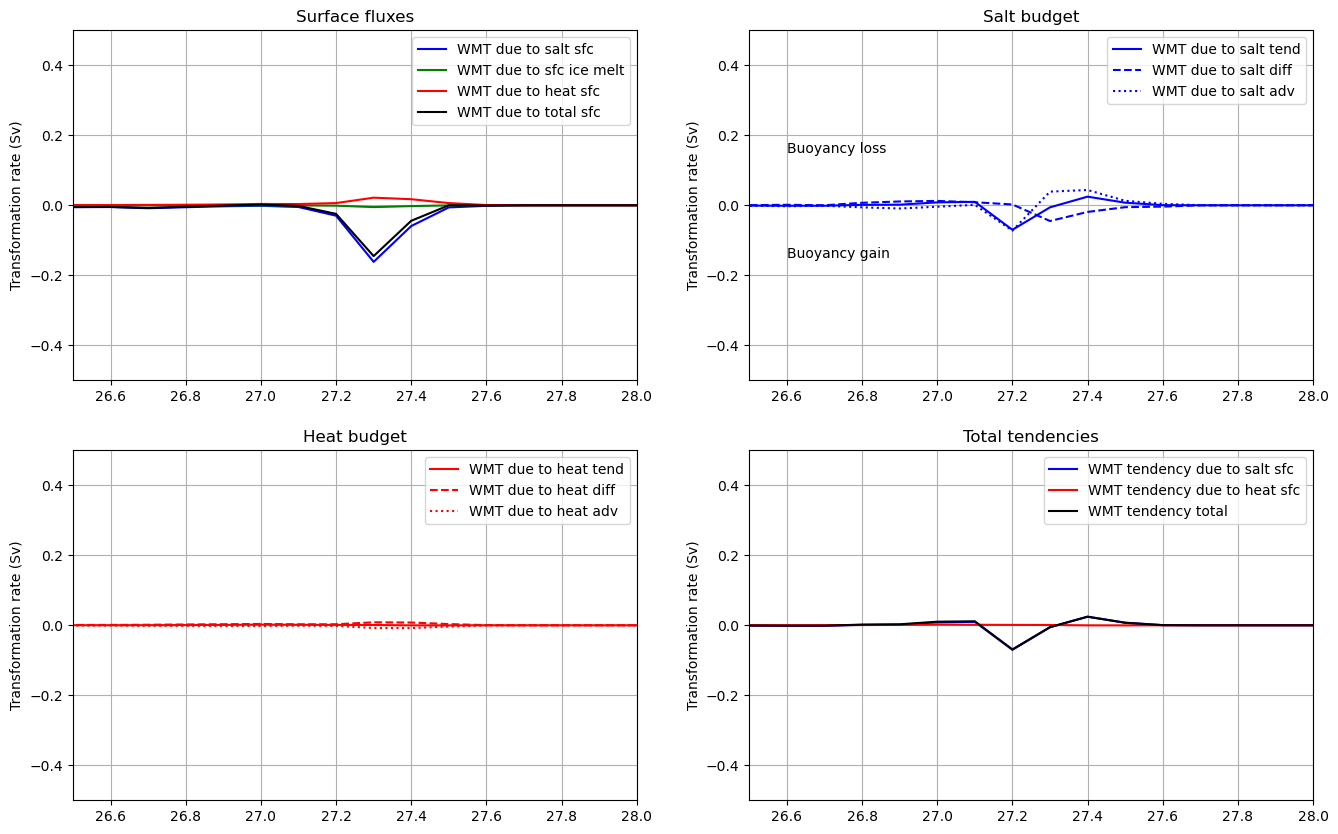

In [11]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(222)
plt.title('Salt budget')
cs=plt.plot(rho_grid,-Fs_sig_net_vint_shelf_Mau,'b',label='WMT due to salt tend')
cs=plt.plot(rho_grid,-Fs_sig_diff_vint_shelf_Mau,'--b',label='WMT due to salt diff')
cs=plt.plot(rho_grid,-Fs_sig_adv_vint_shelf_Mau,':b',label='WMT due to salt adv')
plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-.5,.5)
plt.grid(True)
plt.text(26.6,.15,'Buoyancy loss')
plt.text(26.6,-.15,'Buoyancy gain')
ax1 = fig.add_subplot(223)
plt.title('Heat budget')
ch=plt.plot(rho_grid,Fh_sig_net_vint_shelf_Mau,'r',label='WMT due to heat tend')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_shelf_Mau,'--r',label='WMT due to heat diff')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_shelf_Mau,':r',label='WMT due to heat adv')
plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-.5,.5)
plt.grid(True)

ax2 = fig.add_subplot(221)
plt.title('Surface fluxes')
cs=plt.plot(rho_grid,-Fs_sig_sfc_shelf_Mau,'b',label='WMT due to salt sfc')
cf=plt.plot(rho_grid,Fm_sig_sfc_shelf_Mau,'-g',label='WMT due to sfc ice melt')
ch=plt.plot(rho_grid,Fh_sig_sfc_shelf_Mau,'r',label='WMT due to heat sfc')
ct=plt.plot(rho_grid,F_sig_sfc_shelf_Mau,'k',label='WMT due to total sfc')
plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-.5,.5)
plt.grid(True)

ax2 = fig.add_subplot(224)
plt.title('Net tendencies')
cs=plt.plot(rho_grid,-Fs_sig_net_vint_shelf_Mau,'-b',label='WMT tendency due to salt sfc')
ch=plt.plot(rho_grid,Fh_sig_net_vint_shelf_Mau,'-r',label='WMT tendency due to heat sfc')
ct=plt.plot(rho_grid,Fh_sig_net_vint_shelf_Mau-Fs_sig_net_vint_shelf_Mau,'k',label='WMT tendency total')
plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(26.5,28),plt.ylim(-.5,.5)
plt.grid(True)
plt.title('Total tendencies')
#plt.show()

name_fig="waom10extend_shflim_S_0.25Q_WMT_heat-salt_vint_annual_shelf_Mau.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()